# Importing Libraries 

In [32]:
import pandas as pd
import numpy as np

In [6]:
diabetes = pd.read_csv('diabetes.csv')

In [8]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Normalizing the columns 

In [10]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [11]:
norm_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction']

In [13]:
diabetes[norm_cols] = diabetes[norm_cols].apply(lambda x: (x - x.min() / (x.max() - x.min())))

In [15]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.574611,50,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.298611,31,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.619611,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.114611,21,0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.235611,33,1


# Importing Tensorflow 

In [16]:
import tensorflow as tf

In [17]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

##  Creating feature columns (numeric columns) for each columns

In [18]:
preg = tf.feature_column.numeric_column('Pregnancies')

gluc = tf.feature_column.numeric_column('Glucose')

blood_pres = tf.feature_column.numeric_column('BloodPressure')

skin_thick = tf.feature_column.numeric_column('SkinThickness')

insulin = tf.feature_column.numeric_column('Insulin')

bmi = tf.feature_column.numeric_column('BMI')

dias_pred = tf.feature_column.numeric_column('DiabetesPedigreeFunction')

age = tf.feature_column.numeric_column('Age')

## Adding a text column in dataframe 

### Generating a random alphabet for groups among A, B, C, D 

In [41]:
actual_values = []
new_values = ['A', 'B', 'C', 'D']
for x in range(0, 768):
    
    actual_values.append(new_values[np.random.randint(0, 4)])
    
print(len(actual_values))

768


### Inserting new column with created values 

In [44]:
diabetes['Group'] = actual_values

In [46]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Group
0,6.0,148.0,72.0,35.0,0.0,33.6,0.574611,50,1,C
1,1.0,85.0,66.0,29.0,0.0,26.6,0.298611,31,0,D
2,8.0,183.0,64.0,0.0,0.0,23.3,0.619611,32,1,D
3,1.0,89.0,66.0,23.0,94.0,28.1,0.114611,21,0,A
4,0.0,137.0,40.0,35.0,168.0,43.1,2.235611,33,1,C


## Creating feature columns (categorical column) for each columns

    ~ categorical_column_with_vocabulary_list - When we know the values of the feature column
    
    ~ categorical_column_with_hash_bucket - When we know the number of values can be present in that column 

In [48]:
asssigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group', ['A', 'B', 'C', 'D'])

In [50]:
# asssigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group', hash_bucket_size = 10)

## Importing Matplotlib 

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

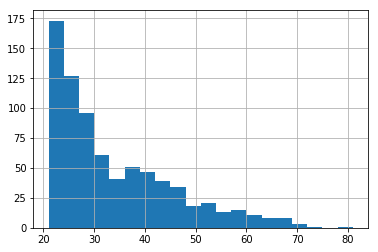

In [52]:
diabetes['Age'].hist(bins = 20)

### Convert age (numeric column)  into categorical column using bucketized_column method

    ~ buketized_column changes the values of the numeric column into a bucket value.
    ~ For Eg:
    
        boundaries = [0, 10, 100]
        input tensor = [[-5, 10000]
                        [150,   10]
                        [5,    100]]
                        
        The output will be
        
        output = [[0, 3]
                  [3, 2]
                  [1, 3]]
                  
        i.e., the values are replaced with the index of the boundaries which we have provided.

In [55]:
age_bucket = tf.feature_column.bucketized_column(age, boundaries = [20, 30, 40, 50, 60, 70, 80])

In [56]:
feat_cols = [preg, gluc, dias_pred, insulin, bmi, blood_pres, skin_thick, asssigned_group, age_bucket]

### Train Test Split 

In [62]:
x_data = diabetes.drop('Outcome', axis = 1)
x_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Group
0,6.0,148.0,72.0,35.0,0.0,33.6,0.574611,50,C
1,1.0,85.0,66.0,29.0,0.0,26.6,0.298611,31,D
2,8.0,183.0,64.0,0.0,0.0,23.3,0.619611,32,D
3,1.0,89.0,66.0,23.0,94.0,28.1,0.114611,21,A
4,0.0,137.0,40.0,35.0,168.0,43.1,2.235611,33,C


In [65]:
labels = diabetes['Outcome']
labels.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

### Importing train test split from sklearn 

In [66]:
from sklearn.model_selection import train_test_split

In [71]:
x_train, x_test, y_train, y_test = train_test_split(x_data, labels, test_size = 0.3, random_state = 101)

### Creating input functions 

In [98]:
input_func = tf.estimator.inputs.pandas_input_fn (x = x_train, y = y_train, 
                                                 batch_size = 100, num_epochs = 1000,
                                                 shuffle = True)

### Instance of Estimator 

In [99]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols, n_classes = 2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp1l7lw0_n', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f3b38c01b00>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


### Train our model 

In [100]:
model.train(input_fn= input_func, steps= 10000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp1l7lw0_n/model.ckpt.
INFO:tensorflow:loss = 69.31472, step = 1
INFO:tensorflow:global_step/sec: 281.361
INFO:tensorflow:loss = 119.25514, step = 101 (0.356 sec)
INFO:tensorflow:global_step/sec: 440.012
INFO:tensorflow:loss = 101.813065, step = 201 (0.228 sec)
INFO:tensorflow:global_step/sec: 436.159
INFO:tensorflow:loss = 74.02742, step = 301 (0.229 sec)
INFO:tensorflow:global_step/sec: 409.962
INFO:tensorflow:loss = 47.398827, step = 401 (0.243 sec)
INFO:tensorflow:global_step/sec: 389.193
INFO:tensorflow:loss = 39.185863, step = 501 (0.257 sec)
INFO:tensorflow:global_step/sec: 434.118
INFO:tensorflow:loss = 53.469772, step = 601 (0.231 sec)
INFO:tensorflow:global_step/sec: 457.884
INFO:tensorflow:l

### Creating input functions for Testing (eval) dataset 

In [101]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x = x_test, y = y_test,
                                                     batch_size = 10, num_epochs= 1,
                                                     shuffle = False)

### Evaluating our model 

In [102]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-02-21-17:43:48
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp1l7lw0_n/model.ckpt-5370
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-02-21-17:43:48
INFO:tensorflow:Saving dict for global step 5370: accuracy = 0.77922076, accuracy_baseline = 0.64935064, auc = 0.8405762, auc_precision_recall = 0.713771, average_loss = 0.47094733, global_step = 5370, label/mean = 0.35064936, loss = 4.532868, precision = 0.7586207, prediction/mean = 0.33097303, recall = 0.54320985
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 5370: /tmp/tmp1l7lw0_n/model.ckpt-5370


In [104]:
results

{'accuracy': 0.77922076,
 'accuracy_baseline': 0.64935064,
 'auc': 0.8405762,
 'auc_precision_recall': 0.713771,
 'average_loss': 0.47094733,
 'label/mean': 0.35064936,
 'loss': 4.532868,
 'precision': 0.7586207,
 'prediction/mean': 0.33097303,
 'recall': 0.54320985,
 'global_step': 5370}

## Predicting a value 

### Creating input function for testing dataset 

In [111]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x = x_test,
                                                     batch_size = 10,
                                                     num_epochs = 1,
                                                     shuffle = False)

In [112]:
predictions = model.predict(pred_input_func)

In [113]:
my_pred = list(predictions)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp1l7lw0_n/model.ckpt-5370
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [114]:
my_pred

[{'logits': array([-0.15026474], dtype=float32),
  'logistic': array([0.46250436], dtype=float32),
  'probabilities': array([0.5374957 , 0.46250436], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([1.8810413], dtype=float32),
  'logistic': array([0.86773074], dtype=float32),
  'probabilities': array([0.13226932, 0.86773074], dtype=float32),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([-1.9080744], dtype=float32),
  'logistic': array([0.12919734], dtype=float32),
  'probabilities': array([0.87080264, 0.12919734], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-0.3453095], dtype=float32),
  'logistic': array([0.41452032], dtype=float32),
  'probabilities': array([0.5854797 , 0.41452032], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-3.0725603], dtype=float32),
  'logistic'

## Dense Neural Network Classifier 

In [116]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10, 10, 10],
                                       feature_columns= feat_cols,
                                      n_classes = 2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpim8ict1e', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f3b3b5b64a8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [119]:
# dnn_model.train(input_func)

### Notes:
    ~ When running the above code, it will throw an error. Because, Dense Neural Network doesnot intake the categorical value. So we have to change it into embedded group columns

In [122]:
embedded_grp_cols = tf.feature_column.embedding_column(asssigned_group, dimension = 4)

### Reconstructing our feat cols 

In [127]:
feat_cols = [preg, gluc, dias_pred, insulin, bmi, blood_pres, skin_thick, embedded_grp_cols, age_bucket]

### Creating input function for train the model 

In [152]:
input_func = tf.estimator.inputs.pandas_input_fn(x_train, y_train, 
                                                batch_size = 100, 
                                                num_epochs = 1000,
                                                shuffle = True)

### Instance of our DNN Model 

In [153]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10, 10, 10],
                                       feature_columns= feat_cols,
                                      n_classes = 2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpr0gtnbmd', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f3b3b928c50>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


### Train our model 

In [ ]:
dnn_model.train(input_fn= input_func, steps = 1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpr0gtnbmd/model.ckpt.
INFO:tensorflow:loss = 2259.489, step = 1
INFO:tensorflow:global_step/sec: 277.807
INFO:tensorflow:loss = 58.207466, step = 101 (0.361 sec)
INFO:tensorflow:global_step/sec: 395.899
INFO:tensorflow:loss = 50.943348, step = 201 (0.253 sec)
INFO:tensorflow:global_step/sec: 392.987
INFO:tensorflow:loss = 54.464928, step = 301 (0.254 sec)


### Evaluate our model 

In [ ]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x = x_test, y = y_test, 
                                                     batch_size = 100,
                                                     num_epochs = 1,
                                                     shuffle = False)

In [150]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-02-21-19:25:30
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpnjiq43ri/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-02-21-19:25:31
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.73593074, accuracy_baseline = 0.64935064, auc = 0.75345683, auc_precision_recall = 0.64031255, average_loss = 0.56001836, global_step = 1000, label/mean = 0.35064936, loss = 43.121414, precision = 0.6923077, prediction/mean = 0.39295712, recall = 0.44444445
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /tmp/tmpnjiq43ri/model.ckpt-1000


{'accuracy': 0.73593074,
 'accuracy_baseline': 0.64935064,
 'auc': 0.75345683,
 'auc_precision_recall': 0.64031255,
 'average_loss': 0.56001836,
 'label/mean': 0.35064936,
 'loss': 43.121414,
 'precision': 0.6923077,
 'prediction/mean': 0.39295712,
 'recall': 0.44444445,
 'global_step': 1000}